In [4]:
include("src.jl")
using FFTW, Plots

## Spin echo - J0 = ε = 0

Finished 10th iteration
Finished 20th iteration
Finished 30th iteration
Finished 40th iteration
Finished 50th iteration
Finished 60th iteration
Finished 70th iteration
Finished 80th iteration
Finished 90th iteration
Finished 100th iteration


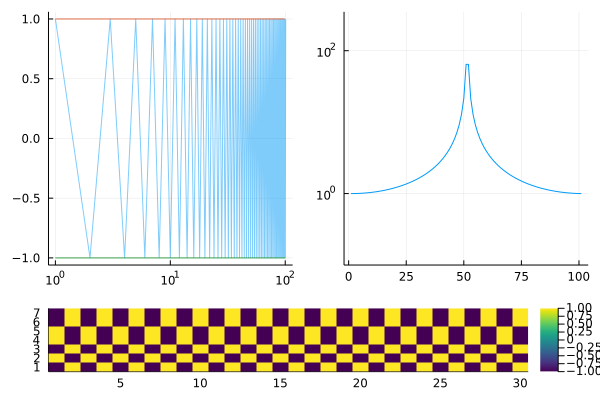

In [86]:
n = 100
realres, spinmap = effAvgAutoCor(100, n, [0,1,0,1,1,0,0], 0.0, 0.0, 0.0, 0.0, 1.0)
res = abs.(fft(realres))
l = @layout [a b ; c{0.2h}] 
plot(realres, opacity=0.5,xscale=:log10, legend=false)
plot!(collect(1:2:n),realres[1:2:n])
p1 = plot!([1; collect(2:2:n)],[-1.0 ; realres[2:2:n]])
p21 = plot(res, yscale =:log10, ylims=(0.1,350), legend=false)
p3 = heatmap(spinmap[:,1:30], c=:viridis, clims=(-1,1))
plot(p1,p21, p3, layout=l)

## MBL with onsite and Ising-even disorder

In [90]:
n = 1000
init=[1,0,1,1,0,0,1,0,1] #rand([0,1],6)
jz = 0.15
ε = 0.05
σh = pi
realres, spinmap = effAvgAutoCor(100, n, init, ε, jz, 0.2*jz, σh, 0.0)
res = abs.(fft(realres))
l = @layout [a b ; c{0.2h}; d{0.2h}] 
plot(realres, opacity=0.5, xscale=:log10, legend=false)
plot!(collect(1:2:n),realres[1:2:n])
p1 = plot!([1; collect(2:2:n)],[-1.0 ; realres[2:2:n]])
p21 = plot(res, yscale =:log10, ylims=(0.1,350), legend=false)
p3 = heatmap(spinmap[:,1:30], c=:viridis, clims=(-1,1))
howitsgoing = 101:130
p4 = heatmap(collect(howitsgoing), collect(1:length(init)), spinmap[:,howitsgoing], c=:viridis, clims=(-1,1))#print(spinmap[:,1001:1030])
plot(p1,p21, p3, p4, layout=l)

Finished 10th iteration
Finished 20th iteration
Finished 30th iteration


LoadError: InterruptException:

In [57]:
using BenchmarkTools

In [8]:

    niters,l, jz, σh = 1, 4, 0.15, pi
    hs, js = gethsandjs(niters,l,jz, 0.2*jz, σh)
    jTensor = getJtensor(l, 0.0, 0.0)
    hTensor = getHtensor(l)
    jArrays = convertToArrays(jTensor)
    hspace = zeros(2^l,2^l)
    @code_warntype efficientHam(hspace,hs,js,jArrays,hTensor)


In [98]:
using BenchmarkTools, LinearAlgebra

In [101]:
function naivematmul!(newVec, mat, oldVec)    
    for i in 1:length(newVec)
        newVec[i] = 0.0
        for j in 1:length(newVec)
            newVec[i] += mat[i,j]*oldVec[j]
        end
    end
end
function yep(l)
    c = rand(2^l)
    A = newU1(l, 0.05)
    b = zeros(2^l)
    #@btime addtoarr($jack,$jill)
    @btime naivematmul!($c, $A, $b)
    @btime mul!($c, $A, $b)
end

yep (generic function with 2 methods)

In [102]:
yep(4)

  265.080 ns (0 allocations: 0 bytes)
  200.911 ns (0 allocations: 0 bytes)


16-element Vector{Float64}:
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0

In [103]:
?mul!

search: mul! rmul! lmul! accumulate! naivematmul! muladd Multinomial



```
mul!(Y, A, B) -> Y
```

Calculates the matrix-matrix or matrix-vector product $AB$ and stores the result in `Y`, overwriting the existing value of `Y`. Note that `Y` must not be aliased with either `A` or `B`.

# Examples

```jldoctest
julia> A=[1.0 2.0; 3.0 4.0]; B=[1.0 1.0; 1.0 1.0]; Y = similar(B); mul!(Y, A, B);

julia> Y
2×2 Matrix{Float64}:
 3.0  3.0
 7.0  7.0
```

# Implementation

For custom matrix and vector types, it is recommended to implement 5-argument `mul!` rather than implementing 3-argument `mul!` directly if possible.

---

```
mul!(C, A, B, α, β) -> C
```

Combined inplace matrix-matrix or matrix-vector multiply-add $A B α + C β$. The result is stored in `C` by overwriting it.  Note that `C` must not be aliased with either `A` or `B`.

!!! compat "Julia 1.3"
    Five-argument `mul!` requires at least Julia 1.3.


# Examples

```jldoctest
julia> A=[1.0 2.0; 3.0 4.0]; B=[1.0 1.0; 1.0 1.0]; C=[1.0 2.0; 3.0 4.0];

julia> mul!(C, A, B, 100.0, 10.0) === C
true

julia> C
2×2 Matrix{Float64}:
 310.0  320.0
 730.0  740.0
```


In [ ]:
l = 
mat = newU1(4, 0.05)

for i in 1:length(unique row elements)

